In [221]:
import pandas as pd
import json
import geopandas as gpd
import os
%matplotlib inline
import geopandas as gp
import pandas as pd
import math
from shapely.geometry import MultiLineString
from shapely.geometry import MultiPoint
import numpy as np
from shapely import geometry
from shapely.geometry import Point, Polygon, box,LineString
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay
from matplotlib import pyplot
import matplotlib.pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon
from numpy import cos,sin,arccos
import numpy as np
from pylab import *
from shapely.ops import cascaded_union
from shapely.geometry import Point, LineString, mapping
import scipy.interpolate
import time
import cudf
import cugraph
import folium

In [235]:
traffic_flow = gpd.read_file("traffic_flow_shp/traffic_flow_26082020/traffic_flow_26082020_0800_0900.shp")
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry
0,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,-,0.71360,2,64.70,64.70,70.0,1.10965,0.71,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74195 3.08229, 101.74197 3.082..."
1,5803,Jalan Cheras Hartamas,-,0.11864,2,57.86,57.86,70.0,2.54339,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74658 3.07899, 101.74688 3.078..."
2,5804,Jalan Medan Masria,-,1.14547,2,67.82,67.82,90.0,3.61394,0.73,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74763 3.07880, 101.74779 3.078..."
3,5803,Jalan Cheras Hartamas,+,0.71240,2,40.69,40.69,84.2,6.47774,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74829 3.07853, 101.74802 3.078..."
4,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,+,0.82177,2,38.09,38.09,67.6,5.66375,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74715 3.07869, 101.74685 3.078..."


In [236]:
traffic_flow.dtypes

TMC_PC         int64
TMC_DE        object
TMC_QD        object
TMC_LE       float64
FC             int64
CF_SP        float64
CF_SU        float64
CF_FF        float64
CF_JF        float64
CF_CN        float64
PBT           object
DE            object
geometry    geometry
dtype: object

In [237]:
traffic_flow['endpoints'] = traffic_flow['geometry'].apply(lambda x: x.boundary)



In [238]:
def return_start_point(x):
    #print(x)
    try:
        return x.boundary[0]
    except:
        return None

def return_end_point(x):
    try:
        return x.boundary[1]
    except:
        return None
    

traffic_flow['start_point'] = traffic_flow['geometry'].apply(lambda x: return_start_point(x))
traffic_flow['end_point'] = traffic_flow['geometry'].apply(lambda x: return_end_point(x))

In [239]:
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry,endpoints,start_point,end_point
0,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,-,0.71360,2,64.70,64.70,70.0,1.10965,0.71,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74195 3.08229, 101.74197 3.082...","MULTIPOINT (101.74195 3.08229, 101.74658 3.07899)",POINT (101.74195 3.08229),POINT (101.74658 3.07899)
1,5803,Jalan Cheras Hartamas,-,0.11864,2,57.86,57.86,70.0,2.54339,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74658 3.07899, 101.74688 3.078...","MULTIPOINT (101.74658 3.07899, 101.74763 3.07880)",POINT (101.74658 3.07899),POINT (101.74763 3.07880)
2,5804,Jalan Medan Masria,-,1.14547,2,67.82,67.82,90.0,3.61394,0.73,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74763 3.07880, 101.74779 3.078...","MULTIPOINT (101.74763 3.07880, 101.74830 3.07868)",POINT (101.74763 3.07880),POINT (101.74830 3.07868)
3,5803,Jalan Cheras Hartamas,+,0.71240,2,40.69,40.69,84.2,6.47774,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74829 3.07853, 101.74802 3.078...","MULTIPOINT (101.74829 3.07853, 101.74715 3.07869)",POINT (101.74829 3.07853),POINT (101.74715 3.07869)
4,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,+,0.82177,2,38.09,38.09,67.6,5.66375,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74715 3.07869, 101.74685 3.078...","MULTIPOINT (101.74715 3.07869, 101.74182 3.08248)",POINT (101.74715 3.07869),POINT (101.74182 3.08248)


In [240]:
traffic_flow = traffic_flow.dropna()

In [241]:
#traffic_flow['road_condition'] = 10 - traffic_flow['CF_JF']
traffic_flow['road_condition'] = traffic_flow['CF_JF']

In [242]:
print(len(traffic_flow))

120828


<AxesSubplot:>

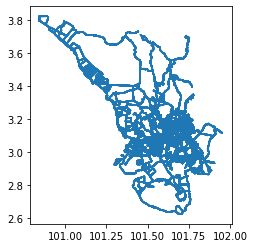

In [243]:
traffic_flow.plot()

In [244]:
print(cugraph.__version__)

0+untagged.1.g892a8e1


In [245]:
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry,endpoints,start_point,end_point,road_condition
0,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,-,0.71360,2,64.70,64.70,70.0,1.10965,0.71,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74195 3.08229, 101.74197 3.082...","MULTIPOINT (101.74195 3.08229, 101.74658 3.07899)",POINT (101.74195 3.08229),POINT (101.74658 3.07899),1.10965
1,5803,Jalan Cheras Hartamas,-,0.11864,2,57.86,57.86,70.0,2.54339,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74658 3.07899, 101.74688 3.078...","MULTIPOINT (101.74658 3.07899, 101.74763 3.07880)",POINT (101.74658 3.07899),POINT (101.74763 3.07880),2.54339
2,5804,Jalan Medan Masria,-,1.14547,2,67.82,67.82,90.0,3.61394,0.73,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74763 3.07880, 101.74779 3.078...","MULTIPOINT (101.74763 3.07880, 101.74830 3.07868)",POINT (101.74763 3.07880),POINT (101.74830 3.07868),3.61394
3,5803,Jalan Cheras Hartamas,+,0.71240,2,40.69,40.69,84.2,6.47774,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74829 3.07853, 101.74802 3.078...","MULTIPOINT (101.74829 3.07853, 101.74715 3.07869)",POINT (101.74829 3.07853),POINT (101.74715 3.07869),6.47774
4,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,+,0.82177,2,38.09,38.09,67.6,5.66375,0.72,2020-08-26T08:49:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74715 3.07869, 101.74685 3.078...","MULTIPOINT (101.74715 3.07869, 101.74182 3.08248)",POINT (101.74715 3.07869),POINT (101.74182 3.08248),5.66375


## Edge DataFrame

In [246]:
edge_arr_distance = []
edge_arr_roadCondition = []
node_dict_gps_to_node = {}
node_dict_node_to_gps = {}
node_counter = 0
for row in traffic_flow.iterrows():
    #print(list(zip(row[1]['start_point'].coords.xy)))
    if row[1]['geometry'].geom_type == 'LineString':
        for seg_start, seg_end in zip(list(row[1]['geometry'].coords),list(row[1]['geometry'].coords)[1:]):
            seg_start_gps = (seg_start[1], seg_start[0])
            seg_end_gps = (seg_end[1], seg_end[0])
            
            if node_dict_gps_to_node.get(seg_start_gps) is None:
                node_dict_gps_to_node[seg_start_gps] = node_counter
                node_dict_node_to_gps[node_counter] = seg_start_gps
                node_counter += 1
                
            if node_dict_gps_to_node.get(seg_end_gps) is None:
                node_dict_gps_to_node[seg_end_gps] = node_counter
                node_dict_node_to_gps[node_counter] = seg_start_gps
                node_counter += 1
            
            edge_arr_distance.append([node_dict_gps_to_node[seg_start_gps], node_dict_gps_to_node[seg_end_gps], float(row[1]['TMC_LE'])])
            edge_arr_roadCondition.append([node_dict_gps_to_node[seg_start_gps], node_dict_gps_to_node[seg_end_gps], float(row[1]['road_condition'])])
            #print(seg_start_gps)
            #kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
            #kl_selangor_graph_distance.add_nodes_from(seg_start_gps)
            #kl_selangor_graph_distance.add_nodes_from(seg_end_gps)
            #kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
            #kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
            #kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
            #graph_nodes.append(Point(seg_start_gps))
            #graph_nodes.append(Point(seg_end_gps))
    elif row[1]['geometry'].geom_type == 'MultiLineString':
        for line_part in row[1]['geometry']:
            for seg_start, seg_end in zip(list(line_part.coords),list(line_part.coords)[1:]):
                seg_start_gps = (seg_start[1], seg_start[0])
                seg_end_gps = (seg_end[1], seg_end[0])
                
                if node_dict_gps_to_node.get(seg_start_gps) is None:
                    #print(seg_start_gps)
                    node_dict_gps_to_node[seg_start_gps] = node_counter
                    node_dict_node_to_gps[node_counter] = seg_start_gps
                    node_counter += 1

                if node_dict_gps_to_node.get(seg_end_gps) is None:
                    #print(seg_end_gps)
                    node_dict_gps_to_node[seg_end_gps] = node_counter
                    node_dict_node_to_gps[node_counter] = seg_start_gps
                    node_counter += 1

                edge_arr_distance.append([node_dict_gps_to_node[seg_start_gps], node_dict_gps_to_node[seg_end_gps], float(row[1]['TMC_LE'])])
                edge_arr_roadCondition.append([node_dict_gps_to_node[seg_start_gps], node_dict_gps_to_node[seg_end_gps], float(row[1]['road_condition'])])
                #print(seg_start_gps)
                #kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
                #kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
                #kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
                #kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
               


In [260]:
print(node_dict_gps_to_node.get(seg_start_gps))
print(node_dict_gps_to_node.get(seg_end_gps))

87008
52936


In [261]:
test = pd.DataFrame(edge_arr_distance)
print(len(test))
test.head()

2447040


,0,1,2
0,0,1,0.7136
1,1,2,0.7136
2,2,3,0.7136
3,3,4,0.7136
4,4,5,0.7136


In [262]:
test = pd.DataFrame(edge_arr_roadCondition)
print(len(test))
test.head()

2447040


,0,1,2
0,0,1,1.10965
1,1,2,1.10965
2,2,3,1.10965
3,3,4,1.10965
4,4,5,1.10965


In [263]:
edge_df_distance = cudf.DataFrame.from_pandas(pd.DataFrame(edge_arr_distance))
edge_df_roadCondition = cudf.DataFrame.from_pandas(pd.DataFrame(edge_arr_roadCondition))

In [264]:
edge_df_distance.tail()

,0,1,2
2447035,87004,87005,0.98796
2447036,87005,87006,0.98796
2447037,87006,87007,0.98796
2447038,87007,87008,0.98796
2447039,87008,52936,0.98796


## Network Creation

In [265]:
kl_selangor_graph_distance = cugraph.Graph()
kl_selangor_graph_distance.from_cudf_edgelist(edge_df_distance, source=0, destination=1, edge_attr=2)

kl_selangor_graph_roadCondition = cugraph.Graph()
kl_selangor_graph_roadCondition.from_cudf_edgelist(edge_df_roadCondition, source=0, destination=1, edge_attr=2)


In [266]:
origin = (3.01689, 101.37124)
destination = (2.97395, 101.68976)

print(node_dict_gps_to_node[origin])
print(node_dict_gps_to_node[destination])

43018
44039


In [267]:
distances_distance = cugraph.shortest_path(kl_selangor_graph_distance, 43018)
distances_roadCondition = cugraph.shortest_path(kl_selangor_graph_roadCondition, 43018)

In [268]:
print(kl_selangor_graph_distance.has_node(43018))
print(kl_selangor_graph_distance.has_node(43018))

True
True


In [269]:
distances_distance

,distance,vertex,predecessor
0,1.797693e+308,130409,-1
1,1.797693e+308,130410,-1
2,1.797693e+308,130411,-1
3,1.797693e+308,130412,-1
4,1.797693e+308,130413,-1
...,...,...,...
144311,1.916869e+04,143075,143076
144312,1.928526e+04,109903,109902
144313,1.928633e+04,109904,109903
144314,1.928739e+04,109905,109904


In [270]:
distances_distance[distances_distance['vertex'] == 44039]

,distance,vertex,predecessor
4045,19338.94158,44039,44072


In [271]:
distances_roadCondition[distances_roadCondition['vertex'] == 44039]

,distance,vertex,predecessor
3117,374.32497,44039,44040


In [272]:
distances_distance.head()

,distance,vertex,predecessor
0,1.797693e+308,130409,-1
1,1.797693e+308,130410,-1
2,1.797693e+308,130411,-1
3,1.797693e+308,130412,-1
4,1.797693e+308,130413,-1


# Path Creation

In [273]:
distances_distance_dict = {}
for row in distances_distance.to_pandas().iterrows():
    if row[1]['predecessor'] != -1:
        distances_distance_dict[row[1]['vertex']] = row[1]['predecessor'] 
        
distances_roadCondition_dict = {}
for row in distances_roadCondition.to_pandas().iterrows():
    if row[1]['predecessor'] != -1:
        distances_roadCondition_dict[row[1]['vertex']] = row[1]['predecessor'] 

In [274]:
distances_distance_dict

{122271.0: 122335.0,
 122379.0: 70154.0,
 32374.0: 32373.0,
 32375.0: 32374.0,
 32376.0: 32375.0,
 32377.0: 32376.0,
 32378.0: 32377.0,
 32379.0: 32378.0,
 32433.0: 32432.0,
 32434.0: 32433.0,
 32435.0: 32434.0,
 32436.0: 32435.0,
 32437.0: 32436.0,
 32438.0: 32437.0,
 32439.0: 32438.0,
 32440.0: 32439.0,
 32441.0: 32440.0,
 32442.0: 32441.0,
 32443.0: 32442.0,
 32444.0: 32443.0,
 32445.0: 32444.0,
 32446.0: 32445.0,
 32447.0: 32446.0,
 32448.0: 32447.0,
 32449.0: 32448.0,
 32450.0: 32449.0,
 32451.0: 32380.0,
 32452.0: 32451.0,
 32453.0: 32454.0,
 32454.0: 32455.0,
 32455.0: 32456.0,
 32456.0: 32457.0,
 32457.0: 32458.0,
 32458.0: 32459.0,
 26564.0: 14121.0,
 26565.0: 26564.0,
 26566.0: 26565.0,
 26567.0: 26566.0,
 4998.0: 4997.0,
 4999.0: 4998.0,
 5000.0: 4999.0,
 5001.0: 5000.0,
 5002.0: 5001.0,
 5003.0: 5002.0,
 5004.0: 5003.0,
 5005.0: 5004.0,
 5006.0: 5005.0,
 5007.0: 5006.0,
 5008.0: 5007.0,
 5009.0: 5008.0,
 5010.0: 5009.0,
 5011.0: 5010.0,
 5012.0: 5011.0,
 5013.0: 5012.0,
 50

In [275]:
distances_roadCondition_dict

{122271.0: 122335.0,
 122379.0: 70154.0,
 26564.0: 14121.0,
 26565.0: 26564.0,
 26566.0: 26565.0,
 26567.0: 26566.0,
 45848.0: 45847.0,
 46084.0: 46083.0,
 46128.0: 45788.0,
 46130.0: 45786.0,
 46153.0: 100496.0,
 46154.0: 45760.0,
 35455.0: 35454.0,
 35529.0: 35530.0,
 35530.0: 96530.0,
 35615.0: 38709.0,
 35625.0: 35624.0,
 35626.0: 35625.0,
 35660.0: 35661.0,
 35669.0: 35670.0,
 35714.0: 35715.0,
 35720.0: 35721.0,
 35753.0: 116631.0,
 35773.0: 116545.0,
 35828.0: 38883.0,
 36009.0: 36985.0,
 36047.0: 36946.0,
 36074.0: 36073.0,
 36144.0: 131490.0,
 36158.0: 130551.0,
 36237.0: 58041.0,
 36300.0: 36301.0,
 36310.0: 117346.0,
 36327.0: 36328.0,
 36328.0: 63905.0,
 36346.0: 36345.0,
 36470.0: 36471.0,
 36508.0: 117457.0,
 36580.0: 53661.0,
 36626.0: 36625.0,
 36700.0: 70953.0,
 36762.0: 36763.0,
 36768.0: 36769.0,
 36771.0: 36772.0,
 12508.0: 12507.0,
 12509.0: 12510.0,
 12510.0: 12511.0,
 12512.0: 12511.0,
 12513.0: 12514.0,
 12515.0: 12514.0,
 12516.0: 12515.0,
 12517.0: 12516.0,
 1

In [276]:
distances_distance_path = []
startNode = 43018
endNode = 44039

distances_distance_path.append(endNode)
while endNode != startNode:
    endNode = distances_distance_dict[endNode]
    distances_distance_path.append(endNode)
    
    
distances_roadCondition_path = []
startNode = 43018
endNode = 44039

distances_roadCondition_path.append(endNode)
while endNode != startNode:
    endNode = distances_roadCondition_dict[endNode]
    distances_roadCondition_path.append(endNode)

In [277]:
distances_distance_path

[44039,
 44072.0,
 44071.0,
 44070.0,
 44069.0,
 44068.0,
 44067.0,
 44066.0,
 44065.0,
 44064.0,
 44063.0,
 44062.0,
 44061.0,
 44691.0,
 44690.0,
 44689.0,
 44688.0,
 44687.0,
 44686.0,
 44685.0,
 44684.0,
 44683.0,
 44682.0,
 44681.0,
 44680.0,
 44679.0,
 44678.0,
 44677.0,
 44676.0,
 44675.0,
 44674.0,
 44673.0,
 44672.0,
 44671.0,
 44670.0,
 44669.0,
 44668.0,
 44667.0,
 44666.0,
 44665.0,
 44664.0,
 44663.0,
 44662.0,
 44661.0,
 44660.0,
 44659.0,
 44658.0,
 44657.0,
 44656.0,
 44655.0,
 44654.0,
 44878.0,
 44879.0,
 44880.0,
 44881.0,
 44882.0,
 44883.0,
 44884.0,
 44885.0,
 44886.0,
 44887.0,
 44888.0,
 44889.0,
 44890.0,
 44891.0,
 44892.0,
 44893.0,
 44894.0,
 44895.0,
 44896.0,
 44897.0,
 44898.0,
 44899.0,
 44900.0,
 44901.0,
 44902.0,
 44903.0,
 44904.0,
 44905.0,
 44906.0,
 44907.0,
 44908.0,
 44909.0,
 44910.0,
 44911.0,
 44912.0,
 44913.0,
 44914.0,
 44915.0,
 44916.0,
 44917.0,
 44918.0,
 44919.0,
 44920.0,
 44921.0,
 44922.0,
 44923.0,
 44924.0,
 44925.0,
 44926.0,
 4

In [278]:
distances_roadCondition_path

[44039,
 44040.0,
 44041.0,
 44042.0,
 44043.0,
 44044.0,
 44837.0,
 44838.0,
 44839.0,
 44840.0,
 44841.0,
 44842.0,
 44843.0,
 44844.0,
 44845.0,
 44060.0,
 44846.0,
 44847.0,
 44848.0,
 44849.0,
 44850.0,
 44851.0,
 44852.0,
 44853.0,
 44854.0,
 44855.0,
 44856.0,
 44857.0,
 44858.0,
 52308.0,
 52307.0,
 52306.0,
 52305.0,
 52304.0,
 52303.0,
 52302.0,
 52301.0,
 52300.0,
 52299.0,
 52298.0,
 52297.0,
 52296.0,
 52295.0,
 52294.0,
 52293.0,
 52292.0,
 52291.0,
 52290.0,
 52289.0,
 52288.0,
 52287.0,
 52286.0,
 52285.0,
 52284.0,
 52283.0,
 52282.0,
 52281.0,
 52280.0,
 52279.0,
 135624.0,
 135623.0,
 135622.0,
 135538.0,
 135537.0,
 135536.0,
 52278.0,
 52277.0,
 52276.0,
 52275.0,
 52274.0,
 52273.0,
 52272.0,
 52271.0,
 52270.0,
 52269.0,
 52268.0,
 52267.0,
 52266.0,
 52265.0,
 52264.0,
 52263.0,
 52262.0,
 52261.0,
 52260.0,
 52259.0,
 52258.0,
 52257.0,
 52256.0,
 52255.0,
 52254.0,
 52253.0,
 52252.0,
 52251.0,
 52250.0,
 52249.0,
 52248.0,
 52247.0,
 52246.0,
 52245.0,
 52244

In [279]:
node_dict_gps_to_node

{(3.08229, 101.74195): 0,
 (3.08209, 101.74197): 1,
 (3.08204, 101.74198): 2,
 (3.08195, 101.74199): 3,
 (3.08189, 101.74199): 4,
 (3.08168, 101.74202): 5,
 (3.08149, 101.74206): 6,
 (3.08124, 101.74213): 7,
 (3.08109, 101.74218): 8,
 (3.08091, 101.74226): 9,
 (3.08069, 101.74238): 10,
 (3.08036, 101.7426): 11,
 (3.08007, 101.74286): 12,
 (3.07994, 101.74299): 13,
 (3.07981, 101.74314): 14,
 (3.07969, 101.74331): 15,
 (3.07961, 101.74345): 16,
 (3.07955, 101.74357): 17,
 (3.07951, 101.74365): 18,
 (3.07946, 101.74377): 19,
 (3.07943, 101.74383): 20,
 (3.07934, 101.74407): 21,
 (3.07928, 101.74426): 22,
 (3.07924, 101.74446): 23,
 (3.0792, 101.74464): 24,
 (3.07914, 101.74498): 25,
 (3.07909, 101.74525): 26,
 (3.07902, 101.74579): 27,
 (3.07901, 101.74585): 28,
 (3.07899, 101.74607): 29,
 (3.07899, 101.74622): 30,
 (3.07899, 101.74658): 31,
 (3.07895, 101.74688): 32,
 (3.07889, 101.74719): 33,
 (3.07884, 101.74742): 34,
 (3.0788, 101.74763): 35,
 (3.07877, 101.74779): 36,
 (3.07871, 101

In [280]:
node_dict_node_to_gps

{0: (3.08229, 101.74195),
 1: (3.08229, 101.74195),
 2: (3.08209, 101.74197),
 3: (3.08204, 101.74198),
 4: (3.08195, 101.74199),
 5: (3.08189, 101.74199),
 6: (3.08168, 101.74202),
 7: (3.08149, 101.74206),
 8: (3.08124, 101.74213),
 9: (3.08109, 101.74218),
 10: (3.08091, 101.74226),
 11: (3.08069, 101.74238),
 12: (3.08036, 101.7426),
 13: (3.08007, 101.74286),
 14: (3.07994, 101.74299),
 15: (3.07981, 101.74314),
 16: (3.07969, 101.74331),
 17: (3.07961, 101.74345),
 18: (3.07955, 101.74357),
 19: (3.07951, 101.74365),
 20: (3.07946, 101.74377),
 21: (3.07943, 101.74383),
 22: (3.07934, 101.74407),
 23: (3.07928, 101.74426),
 24: (3.07924, 101.74446),
 25: (3.0792, 101.74464),
 26: (3.07914, 101.74498),
 27: (3.07909, 101.74525),
 28: (3.07902, 101.74579),
 29: (3.07901, 101.74585),
 30: (3.07899, 101.74607),
 31: (3.07899, 101.74622),
 32: (3.07899, 101.74658),
 33: (3.07895, 101.74688),
 34: (3.07889, 101.74719),
 35: (3.07884, 101.74742),
 36: (3.0788, 101.74763),
 37: (3.07877,

In [281]:
route_1 = []
for element in distances_distance_path:
    route_1.append(node_dict_node_to_gps[element])
    
route_2 = []
for element in distances_roadCondition_path:
    route_2.append(node_dict_node_to_gps[element])

In [282]:
route_1

[(3.02852, 101.7709),
 (3.02961, 101.77009),
 (3.03013, 101.7699),
 (3.03041, 101.76983),
 (3.0305, 101.76981),
 (3.03082, 101.76978),
 (3.03094, 101.76978),
 (3.03128, 101.76979),
 (3.03167, 101.76986),
 (3.03192, 101.76992),
 (3.03215, 101.76997),
 (3.03231, 101.76998),
 (3.03231, 101.76998),
 (3.03258, 101.7701),
 (3.0327, 101.77015),
 (3.03292, 101.77023),
 (3.03353, 101.77044),
 (3.03398, 101.77062),
 (3.0346, 101.77087),
 (3.03466, 101.77089),
 (3.03517, 101.77109),
 (3.03529, 101.77114),
 (3.0354, 101.77119),
 (3.03562, 101.77129),
 (3.03588, 101.77141),
 (3.03592, 101.77143),
 (3.03605, 101.7715),
 (3.03615, 101.77155),
 (3.03631, 101.77163),
 (3.03642, 101.77169),
 (3.03674, 101.77186),
 (3.03727, 101.77214),
 (3.03738, 101.7722),
 (3.03746, 101.77224),
 (3.03761, 101.77232),
 (3.03785, 101.77244),
 (3.03843, 101.77272),
 (3.03877, 101.77287),
 (3.03923, 101.77305),
 (3.0395, 101.77315),
 (3.03971, 101.77322),
 (3.04043, 101.77348),
 (3.04058, 101.77353),
 (3.04088, 101.77363)

In [283]:
route_2

[(3.02852, 101.7709),
 (3.02889, 101.77054),
 (3.02905, 101.77026),
 (3.02911, 101.77015),
 (3.02928, 101.7699),
 (3.02937, 101.76971),
 (3.0295, 101.76952),
 (3.02991, 101.76945),
 (3.03019, 101.76943),
 (3.03047, 101.76942),
 (3.03067, 101.76942),
 (3.03086, 101.76944),
 (3.03111, 101.76947),
 (3.03142, 101.76952),
 (3.03147, 101.76953),
 (3.03186, 101.76949),
 (3.03203, 101.76964),
 (3.03236, 101.76977),
 (3.03276, 101.76995),
 (3.03291, 101.77001),
 (3.03364, 101.77031),
 (3.03419, 101.77054),
 (3.03454, 101.77068),
 (3.03487, 101.7708),
 (3.03534, 101.771),
 (3.03567, 101.77114),
 (3.03593, 101.77126),
 (3.03602, 101.7713),
 (3.03616, 101.77137),
 (3.03642, 101.77122),
 (3.03655, 101.77105),
 (3.0366, 101.77099),
 (3.0367, 101.77087),
 (3.03686, 101.77059),
 (3.0369, 101.7705),
 (3.03694, 101.77038),
 (3.03697, 101.77029),
 (3.03701, 101.77012),
 (3.03704, 101.76995),
 (3.03703, 101.76964),
 (3.037, 101.76938),
 (3.03693, 101.76917),
 (3.03683, 101.76894),
 (3.03674, 101.76879),
 

## Breadth First Search

In [158]:
df = cugraph.bfs(kl_selangor_graph_distance, 43018, return_sp_counter=True)
df.head()

,distance,sp_counter,vertex,predecessor
0,2147483647,0.0,34958,-1
1,2147483647,0.0,34959,-1
2,2147483647,0.0,34960,-1
3,2147483647,0.0,34961,-1
4,2147483647,0.0,34962,-1


In [159]:
df[df['predecessor']!= -1]

,distance,sp_counter,vertex,predecessor
1120,33,1.0,45033,45034
1152,1088,64.0,68447,68448
1153,1087,64.0,68448,68449
1154,1086,64.0,68449,68450
1155,1084,64.0,68451,68452
...,...,...,...,...
144311,440,24.0,81979,81978
144312,423,8.0,93868,93869
144313,422,8.0,93869,93870
144314,421,8.0,93870,93871


In [284]:
kl_selangor_map = folium.Map(location=[3.027020, 101.570559], zoom_start= 10)
folium.PolyLine(route_1, color="blue", weight=10, opacity=1).add_to(kl_selangor_map)
folium.PolyLine(route_2, color="red", weight=5, opacity=0.5).add_to(kl_selangor_map)
kl_selangor_map
